In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('sessions_data.csv')

In [5]:
data['begin_date'] = data.begin_date.str.slice(stop=19)

In [6]:
data['begin_date'] = pd.to_datetime(data['begin_date'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
names = data['client_id'].unique()

In [8]:
names = data['client_id'].unique()
#last = dict(zip(data['client_id'].unique(), [0]*len(data['client_id'].unique())))
#source = dict(zip(data['source'].unique(), [0]*len(data['source'].unique())))
chains = []

for name in names:
    #cur = 'start'
    session = data[data['client_id'] == name].sort_values(by = 'begin_date')
    if not session[session['is_call'] == 1].empty:
        split_date = session[session['is_call'] == 1]['begin_date']
        for i in split_date:
            val = session[session['begin_date'] <= i]['source'].values
            chains.append(np.insert(val, len(val), 1))
    chains.append(np.insert(session['source'].values, len(session), 0))

In [7]:
import pickle 

In [9]:
with open('chains.pickle', 'wb') as f:
    pickle.dump(chains, f)

In [8]:
with open('chains.pickle', 'rb') as f:
    chains = pickle.load(f)

In [24]:
Vold = 0
for i in chains:
    Vold = Vold + len(i) - 1

In [91]:
unq_source = data['source'].unique()
dic = dict(zip(unq_source, [0]*len(unq_source)))
for sor in unq_source:
    for one_chain in chains:
        res = np.where(one_chain == sor)[0]
        if res.size != 0:
            dic[sor] = dic[sor] + res[0] - min(1, res[0])

In [93]:
pd.DataFrame.from_dict(dic, 'index').to_csv('Vloss.csv')

In [12]:
Vloss = pd.read_csv('Vloss.csv')

In [17]:
Vloss.shape

(297, 2)

In [18]:
Vlos = dict(zip(Vloss.iloc[:,0].values, Vloss.iloc[:,1].values))

In [28]:
unq_source = data['source'].unique()
Vnew = dict(zip(unq_source, [0]*len(unq_source)))
for sor in unq_source:
    Vnew[sor] = Vold - Vlos[sor]

In [30]:
with open('Vnew.pickle', 'wb') as f:
    pickle.dump(Vnew, f)

In [7]:
with open('Vnew.pickle', 'rb') as f:
    Vnew = pickle.load(f)

In [31]:
X = 0
for chan in chains:
    if chan[-1] == 1:
        X = X + 1

In [35]:
CVnew = dict(zip(unq_source, [0]*len(unq_source)))
for sor in unq_source:
    cur_sum = 0
    for chan in chains:
        if (chan[-1] == 1) & (sor in chan):
            cur_sum = cur_sum + 1
    CVnew[sor] = X*(1 - cur_sum/X)

In [36]:
with open('CVnew.pickle', 'wb') as f:
    pickle.dump(CVnew, f)

In [8]:
with open('CVnew.pickle', 'rb') as f:
    CVnew = pickle.load(f)

In [10]:
unq_source = data['source'].dropna().unique()
CPAnew = dict(zip(unq_source, [0]*len(unq_source)))
for sor in unq_source:
    CPAnew[sor] = Vnew[sor]/CVnew[sor]

In [21]:
pd.DataFrame(list(zip(list(CPAnew.values()), list(Vnew.values()), list(CVnew.values()))),
             columns = ['CPA', 'Vnew', 'CVnew'], index = unq_source).to_csv('newLabels.csv')

In [22]:
unq_user = data['client_id'].unique()

In [25]:
session = data[data['client_id'] == unq_user[0]].sort_values(by = 'begin_date')

In [41]:
session

,session_id,source,begin_date,client_id,is_uniq,is_call
387536,1.162658e+09,metrinfo,2017-12-01 00:25:38,2.837755e+08,0.0,0.0
434930,1.162658e+09,GA,2017-12-01 00:29:27,2.837755e+08,0.0,0.0
0,1.162658e+09,(direct),2017-12-01 00:29:33,2.837755e+08,0.0,1.0
26952,1.162718e+09,GA,2017-12-01 08:54:14,2.837755e+08,0.0,0.0
377781,1.163221e+09,GA,2017-12-02 08:23:14,2.837755e+08,0.0,0.0
347326,1.164529e+09,GA,2017-12-04 19:37:16,2.837755e+08,0.0,0.0
336901,1.164916e+09,(direct),2017-12-05 14:50:06,2.837755e+08,0.0,0.0
334181,1.169356e+09,google,2017-12-14 07:32:20,2.837755e+08,0.0,0.0


In [27]:
split_date = session[session['is_call'] == 1]['begin_date']
session[session['begin_date'] <= split_date[0]]

,session_id,source,begin_date,client_id,is_uniq,is_call
387536,1.162658e+09,metrinfo,2017-12-01 00:25:38,2.837755e+08,0.0,0.0
434930,1.162658e+09,GA,2017-12-01 00:29:27,2.837755e+08,0.0,0.0
0,1.162658e+09,(direct),2017-12-01 00:29:33,2.837755e+08,0.0,1.0


In [28]:
session[session['begin_date'] > split_date[0]]

,session_id,source,begin_date,client_id,is_uniq,is_call
26952,1.162718e+09,GA,2017-12-01 08:54:14,2.837755e+08,0.0,0.0
377781,1.163221e+09,GA,2017-12-02 08:23:14,2.837755e+08,0.0,0.0
347326,1.164529e+09,GA,2017-12-04 19:37:16,2.837755e+08,0.0,0.0
336901,1.164916e+09,(direct),2017-12-05 14:50:06,2.837755e+08,0.0,0.0
334181,1.169356e+09,google,2017-12-14 07:32:20,2.837755e+08,0.0,0.0


In [40]:
list(chains[0])

['metrinfo', 'GA', '(direct)', 1]

In [39]:
list(chains[1])

['metrinfo', 'GA', '(direct)', 'GA', 'GA', 'GA', '(direct)', 'google', 0]

In [12]:
sort = {k: v for k, v in sorted(CPAnew.items(), key=lambda item: item[1])}

In [15]:
{k: v for k, v in list(sort.items())[:5]}

{'youtube.com': 204.95278396436527,
 'ispanskie.ru': 205.06455921638468,
 'novostroy-m.ru': 205.07747105966163,
 'criteo': 205.0792520035619,
 'rambler': 205.08370436331256}

In [16]:
{k: v for k, v in list(sort.items())[-5:]}

{'YDzb': 212.26245387453875,
 'yandex': 214.94948550046772,
 'GA': 285.527795128045,
 '(direct)': 291.72304712717886,
 'YD': 345.34890730972114}

In [17]:
chains[0]

array(['metrinfo', 'GA', '(direct)', 1], dtype=object)

In [8]:
exmp = ['(direct)', '(direct)', 'GA', '(direct)', '(direct)', '(direct)', 'GA', 'GA', '(direct)', 'google', 1, 'google', 0]

In [11]:
transform_matrix = np.zeros((5,5))

In [22]:
transform_matrix[0][0] = 0
transform_matrix[0][1] = 0.5
transform_matrix[0][2] = 0.5

transform_matrix[1][0] = 1
transform_matrix[1][1] = 0

transform_matrix[2][3] = 0.5
transform_matrix[2][4] = 0.5

transform_matrix[3][3] = 1
transform_matrix[4][4] = 1

In [27]:
transform_matrix

array([[0. , 0.5, 0.5, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5],
       [0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 1. ]])

In [28]:
mist = []
k = transform_matrix.copy()
for i in range(10):
    mist.append(k[0][-2])
    k = np.dot(k, k)

In [30]:
import matplotlib. pyplot as plt

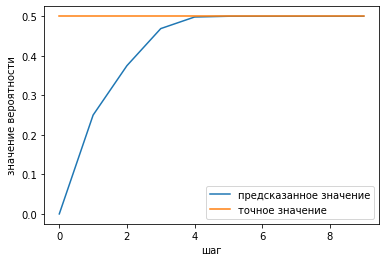

In [33]:
plt.plot(mist, label = 'предсказанное значение')
plt.plot([0.5]*len(mist), label = 'точное значение')
plt.xlabel('шаг')
plt.ylabel('значение вероятности')
plt.legend();

In [36]:
res = []
for one in mist:
    res.append(0.5 - one)

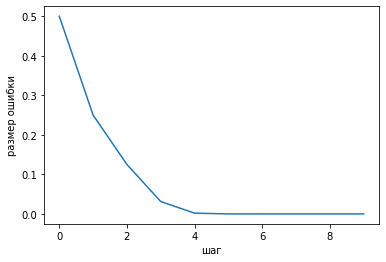

In [39]:
plt.plot(res)
#plt.plot([0.5]*len(mist), label = 'точное значение')
plt.xlabel('шаг')
plt.ylabel('размер ошибки');

In [9]:
unq_source = data['source'].dropna().unique()
move_count = {}
for i in unq_source:
    for j in unq_source:
        move_count[(i,j)] = 0
    move_count[(i,1)] = 0
    move_count[(i,0)] = 0

In [10]:
for chan in chains:
    if chan[-1] == 1:
        move_count[(chan[0], 1)] = move_count[(chan[0], 1)] + 1
    else:
        start = chan[0]
        for i in range(1,len(chan)):
            move_count[(start, chan[i])] = move_count[(start, chan[i])] + 1
            start = chan[i]

In [11]:
start = 0
val = list(move_count.values())
matrix = []
for i in range(298):
    matrix.append(val[start:start + 298])
    start = start + 298

In [12]:
matrix[-2] = [0]*298
matrix[-2][-2] = 1
matrix[-1] = [0]*298
matrix[-1][-1] = 1

In [13]:
np_matrix = np.array(matrix)

In [14]:
np_matrix

array([[ 31353,  13141,      7, ...,      0,    532,  60247],
       [ 13985,  51560,     25, ...,      0,    516, 104675],
       [    20,     38,     69, ...,      0,     40,   2920],
       ...,
       [     0,      0,      0, ...,      0,      0,      1],
       [     0,      0,      0, ...,      0,      1,      0],
       [     0,      0,      0, ...,      0,      0,      1]])

In [15]:
for i in range(296):
    np_matrix[i][i] = 0

In [16]:
prob_matrix = (np_matrix / np.sum(np_matrix, axis = 1)[:,np.newaxis])

In [17]:
for _ in range(10):
    prob_matrix = np.dot(prob_matrix, prob_matrix)

In [18]:
prob_list = []
for i in range(len(unq_source)):
    prob_list.append(prob_matrix[i][-2])
prob_dic = dict(zip(unq_source, prob_list))

In [20]:
sort = {k: v for k, v in sorted(prob_dic.items(), key=lambda item: item[1])}

In [21]:
{k: sort[k] for k in list(sort)[-5:]}

{'org.telegram.messenger': 0.05420619245303348,
 'link.2gis.ru': 0.07038912079544767,
 'bing.com': 0.07628910114156133,
 'cian.ru': 0.08188558078156173,
 'dommsk': 0.2024098172301339}

In [22]:
print('YD: ', sort['YD'])
print('(direct): ', sort['(direct)'])
print('GA: ',sort['GA'])
print('yandex: ', sort['yandex'])
print('google: ', sort['google'])
print('YDzb: ', sort['YDzb'])

YD:  0.008830959763266909
(direct):  0.008181287662503716
GA:  0.005373793620125026
yandex:  0.012049086150669434
google:  0.012051805242105727
YDzb:  0.004623023206154886
